# CSBP 1300

# Regression Project

## Name:

<span style="color:red">Remi Pecora</span>

---
## Instructions

- Make sure the `pizza_prices.csv`, `crickets_train.csv`, and `crickets_test.csv` files are located in the same directory as this notebook
- Complete each of the code cells marked with: <span style="color:green"># ENTER YOUR CODE HERE</span>
- Complete the notebook in order from top to bottom as most of the sections require code from previous sections
- Since many of the sections require code from the previous sections, every time you reopen this notebook, I highly suggest you do the following:
    - Select the code cell you are currently working on or want to work on. The selected code cell should display a colored bounding box around it.
    - In the menu bar at the top of the page, select `Kernel -> Restart Kernel and Run up to Selected Cell...` and then select the `Restart` button to confirm
        - This restarts the kernel to ensure your code is starting from a blank slate
        - This will attempt to run all of the cells in the notebook from the top of the page down to the cell directly above the current cell you have selected
        - All of the variables, functions, etc. that you created in the previous cells will be loaded into memory for your use in the current kernel session
- The sanity check cells are there to give you a general idea if your code is working as expected

---
# Predicting Pizza Prices

Linear regression is probably one of the most widely used algorithms in data science, and many other sciences. One of the best things about linear regression is that it allows us to learn from things that we know or observations and measurements of things we know to make predictions about new things. These predictions might be about the likelihood of a person buying a product online or the chance that someone will default on their loan payments. To start we are going to use an even simpler example predicting the price of pizza based on its diameter.

We have made a study of the pizza places in the neighborhood and here is a table of observations of pizza diameters and their actual price.

|Diameter|Price|
|-|-|
|6|7|
|8|9|
|10|13|
|14|17.5|
|18|18|

---
### Read Pizza Data
Read in the comma-separated values file called `pizza_prices.csv`. Save the diameter values to a list called `diameters` and the prices to a list called `prices`. Both lists should contain floating point values and not strings. You'll have to take into account that there is a header row in the file. You are allowed to use Python's built-in string methods such as `split`.

In [1]:
# ENTER YOUR CODE HERE
import csv
diameters, prices = [], []
with open("pizza_prices.csv","r") as file:
    reader = csv.reader(file)
    first_row = next(reader)
    for row in reader:
        diameters.append(row[0])
        prices.append(row[1])
    diameters = [int(x) for x in diameters]
    prices = [float(x) for x in prices]
        
print(diameters)
print(prices)

[6, 8, 10, 14, 18]
[7.0, 9.0, 13.0, 17.5, 18.0]


In [2]:
# Run this cell to print the data
print(diameters)
print(prices)

[6, 8, 10, 14, 18]
[7.0, 9.0, 13.0, 17.5, 18.0]


In [3]:
# Run this cell to perform a sanity check
assert diameters == [6.0, 8.0, 10.0, 14.0, 18.0], 'Incorrect result'
assert prices == [7.0, 9.0, 13.0, 17.5, 18.0], 'Incorrect result'
print('Pass')

Pass


---
### Plotting
We are going to make a scatter plot of the pizza data. To do this, we will be using a popular Python visualization library called Matplotlib. First we need to import the `Matplotlib.pyplot` library. *Note that this import statement only needs to be excuted once per notebook per session. If you close your notebook and open it again at a later time, remember to re-execute the import cell below in order for the rest of your plots in this notebook to work correctly.*

In [4]:
import matplotlib.pyplot as plt

Below is a simple example of how we can use Matplotlib to plot some data. First, I defined two lists that will hold the x and y values. Then I passed these lists into the `plot` method of the `matplotlib.pyplot` library. I specified that I wanted circle markers (i.e. a scatter plot) using the format string `'o'`. Then I set a plot title and x and y axis labels.

If you need a refresher on how the cartesian coordinate system works: https://www.mathsisfun.com/data/cartesian-coordinates.html

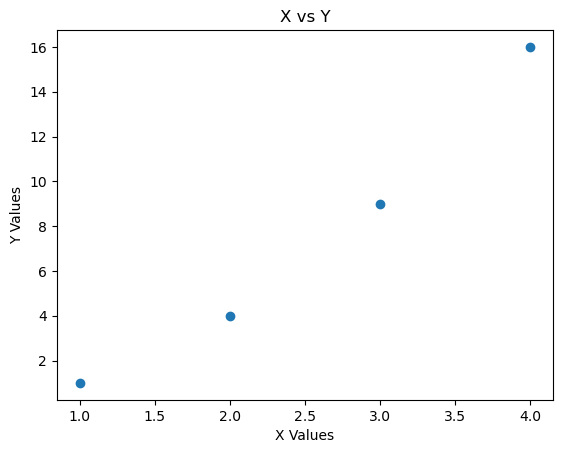

In [5]:
# Run this cell to see the example plot
x_vals = [1,2,3,4]
y_vals = [1,4,9,16]
plt.plot(x_vals, y_vals, 'o')
plt.title('X vs Y')
plt.xlabel('X Values')
plt.ylabel('Y Values');

Some Matplotlib links for your reference:
- `plot` method information: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot
- Some examples: https://matplotlib.org/tutorials/introductory/pyplot.html
- More library functions: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot

---
### Plotting Pizza Data
Now it's your turn! Use the Matplotlib library to plot the pizza data you imported earlier. The x-axis should be the diameter values and the y-axis should be the prices. You can just pass the `diameters` and `prices` Python lists directly into your `plot` method. Make sure to label the x and y axes and give the plot a title. Feel free to play around with the other options you found for the `plot` method. For example, I used a `grid` below and a `legend`.

The resulting plot should look similar to this:

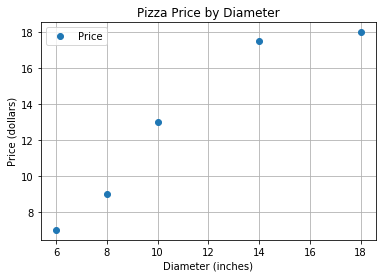

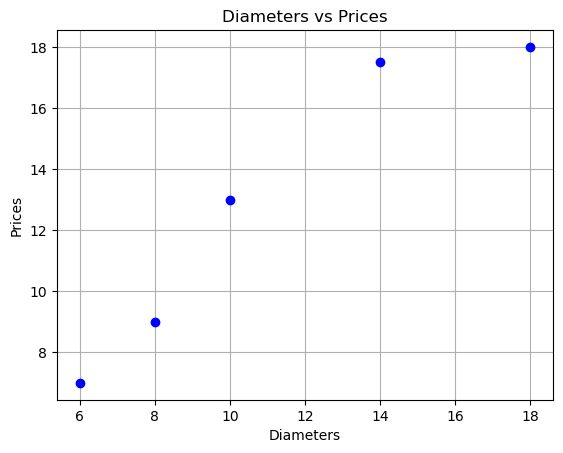

In [6]:
# ENTER YOUR CODE HERE

#x_vals = diameters
#y_vals = prices
plt.plot(diameters, prices, "bo")
plt.title("Diameters vs Prices")
plt.xlabel("Diameters")
plt.ylabel("Prices")
plt.grid();

What you can see pretty easily from this graph is that as the diameter of the pizza goes up, so does the price. If you were to draw a straight line through the points that came as close as possible to all of them, it would look something like this:

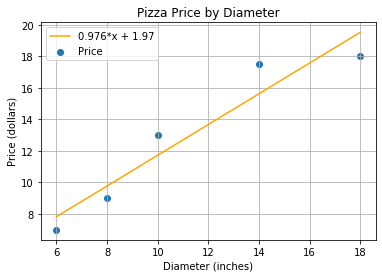

The orange line, called the trend-line or the regression line, is our best guess at a line that describes the data. This is important because we can come up with an equation for the line that will allow us to predict the y value (price) for any given x value (diameter). Linear regression is all about finding the best equation for the line.

How do we do that? There are actually several different ways we can come up with the equation for the line. We will look at two different solutions: One is a closed form equation that will work for any problem like this in just two dimensions. The second is a solution that will allow us to generalize the idea of a best fit line to many dimensions!

Recall the equation for a line that you learned in algebra:
$$y = mx+b$$
Where $m$ is slope and $b$ is the y-intercept. Here's a refresher if you need it: https://www.mathsisfun.com/equation_of_line.html

What we need to do is to determine values for $m$ and $b$. One way we can do that is to simply guess! And keep refining our guesses until we get to a point where we are not really getting any better. You may think this sounds kind of stupid, but it is actually a pretty fundamental part of many machine learning algorithms. You may also be wondering how we decide what does it mean to “get better”? In the case of our pizza problem, we have some data to work with. So for a given guess of m and b, we can compare the calculated (predicted) y against the known value of y and measure our error.

For example: Suppose we guess that $m = 0.7$ and $b = 5$. For a diameter of $10$, we get: $y = mx+b = 0.7 \cdot 10 + 5 = 12$. Checking against our table, the value should be $13$ so our error is our known value minus our predicted value: $error = known-predicted= 13-12 = 1$. If we try the same thing for a diameter of $8$, we get $y = 0.7 \cdot 8 + 5 = 10.6$. The error here is: $error = 9 - 10.6 = -1.6$.

---
### Compute Y
Define a function called `compute_y(x, m, b)`. The function must accept as parameters an x value, the slope m, and the y-intercept b. Using the input parameters, the function must compute the predicted y value using $y=mx+b$ and return the result.

In [7]:
# ENTER YOUR CODE HERE
def compute_y(x, m, b):
    y = m*x + b
    return y
    
print(compute_y(10, 0.7, 5))

12.0


In [8]:
# Run this cell to print the output from your function
compute_y(10, 0.7, 5)

12.0

In [9]:
# Run this cell to perform a sanity check
assert round(compute_y(10, 0.7, 5), 1) == 12.0, 'Incorrect result'
print('Pass')

Pass


---
### Compute All Y
Define a function called `compute_all_y(x_list, m, b)`. The function must accept as parameters a list of x values, the slope m, and the y-intercept b. Using the input parameters, the function must compute the predicted y values for each of the x values and return a list of the predicted y values. Your function must use and call the `compute_y` function from within its function body.

In [10]:
# ENTER YOUR CODE HERE
def compute_all_y(x_list, m, b):
    y = [] # initiate list
    for x in x_list: # iterate through x values
        y.append(compute_y(x, m, b)) # add y value to y list after running x, m, and b values through the compute_y function
    return y

#print(compute_all_y([1,2,3], 4,6))

In [11]:
# Run this cell to print the output from your function
compute_all_y(diameters, 0.7, 5)

[9.2, 10.6, 12.0, 14.799999999999999, 17.6]

In [12]:
# Run this cell to perform a sanity check
assert [round(y, 1) for y in compute_all_y([6,8,10,14,18], 0.7, 5)] == [9.2,10.6,12.0,14.8,17.6], 'Incorrect result'
print('Pass')

Pass


---
### Print Table w/Errors
Calculate the predicted prices for all of the diameters in the original data using the function `compute_all_y`, a slope of `0.7`, and a y-intercept of `5`. Print out your results in a table similar to the one shown below. The table should include a column for the diameter, actual price, predicted price, and error (actual minus predicted). You should try to use Python's string formatting (i.e. `format` method) to assist you with this table. If done correctly, you should be able to do this using a few lines of code and a for loop.

```
Diameter  Actual Price  Predicted Price  Error
     6.0          7.00             9.20  -2.20
     8.0          9.00            10.60  -1.60
    10.0         13.00            12.00   1.00
    14.0         17.50            14.80   2.70
    18.0         18.00            17.60   0.40
```

Here are some examples of how you can use `format` with numbers for alignment, padding, and setting decimal places: https://mkaz.blog/code/python-string-format-cookbook/

In [13]:
# ENTER YOUR CODE HERE
headers = ["Diameter", "Actual Price", "Predicted Price", "Error"]
#diameters = Diameter
#prices = Actual Price
#y = Predicted Price
#prices - y = Error
predicted_prices = compute_all_y(diameters, 0.7, 5) # compute predicted prices
predicted_prices_rounded = [round(price, 2) for price in predicted_prices] # need to round these numbers

errors = [] # initiate a list for errors
for i in range(len(predicted_prices)):
    err = prices[i] - predicted_prices[i] # need to subtract predicted price from actual price for each value on both lists
    err_rounded = round(err, 2)
    errors.append(err_rounded) # add these values to the errors list

#print(predicted_prices_rounded)
#print(errors)
h1 = "Diameter"
h2 = "Actual Price"
h3 = "Predicted Price"
h4 = "Error"
col_wid = 10
print(f"{h1:{col_wid}}\t{h2:{col_wid}}\t{h3:{col_wid}}\t{h4:{col_wid}}")
for col1, col2, col3, col4 in zip(diameters, prices, predicted_prices_rounded, errors):
    print(f"{col1:<{col_wid}}\t{col2:<{col_wid}}\t{col3:<{col_wid}}\t{col4:<{col_wid}}")
#    print("{} \t {:} \t {:} \t {:}".format(col1, col2, col3, col4))


Diameter  	Actual Price	Predicted Price	Error     
6         	7.0       	9.2       	-2.2      
8         	9.0       	10.6      	-1.6      
10        	13.0      	12.0      	1.0       
14        	17.5      	14.8      	2.7       
18        	18.0      	17.6      	0.4       


---
### Plot Predicted Prices
Now plot the original set of data along with the this new table of data using Matplotlib to visualize how close our predicted prices are to the actual prices using this guess for slope and y-intercept. Use your code from the first plot and add a line for the predicted prices. You can add this line by simply calling another `plot` immediately following your first one and passing in the `diameters` for the x values and new predicted prices for the y values. Use one color for the original actual prices and another color for the new predicted prices line. Experiment with some different guesses for the slope and intercept to see how it works and how it affects our predicted prices. The resulting plot should look similar to this:

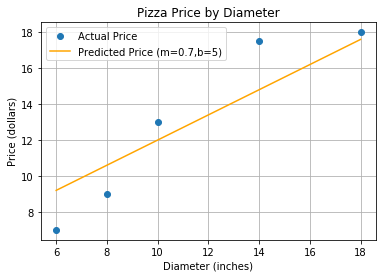

Note: In order to plot a line and not the circle markers, don't specify the format string `'o'`. To change the line color, you can use the `color` parameter with the `plot` method. See the links given earlier in this notebook for more information.

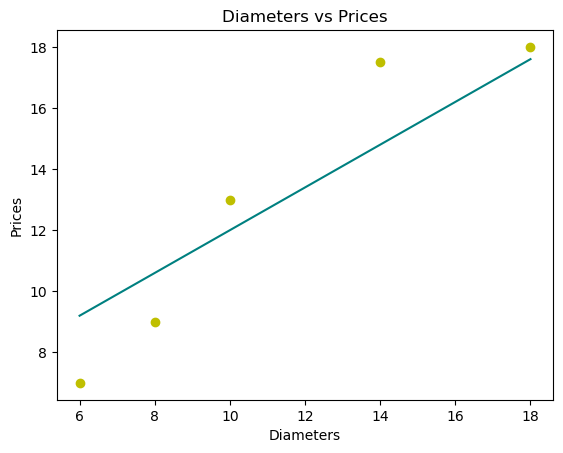

In [14]:
# ENTER YOUR CODE HERE
plt.plot(diameters, prices, "yo")
plt.title("Diameters vs Prices")
plt.xlabel("Diameters")
plt.ylabel("Prices")
plt.grid()
plt.plot(diameters, predicted_prices, color = "teal")
plt.title("Diameters vs Prices")
plt.xlabel("Diameters")
plt.ylabel("Prices")
plt.grid();

---
### Mean Squared Error
Now we have our ‘predicted values’ and a bunch of error measurements. One common way we combine these error measurements together is to compute the Mean Squared Error (MSE). This is easy to compute because all we have to do is square each of our errors, add them up and then divide by the number of error terms we have. Why do we square them first? Well, did you notice that in our example one of the errors was positive and one was negative, but when we add together both positive and negative numbers they tend to cancel each other out making our final mean value smaller. So we square them to be sure they are all positive. We call this calculation of the MSE an objective function. In many machine learning algorithms our goal is to minimize the objective function. That is what we want to do here, we want to find the value for m and b that minimizes the error.

$$ MSE = \frac{1}{n} \sum_{i=1}^{n}{(Y_{i,actual} - Y_{i,predicted})^2} $$

If the sigma symbol above is unfamiliar to you: https://www.mathsisfun.com/algebra/sigma-notation.html

For example, if the actual prices were [4, 6, 8] and the corresponding predicted prices were [3, 5, 7], then the mean squared error would be computed as:
$$MSE = \frac{1}{3}[(4-3)^2 + (6-5)^2 + (8-7)^2] = 1$$

Define a function called `compute_mse(y_actual_list, y_predicted_list)`. This function must accept as parameters a list of the known/actual y values and a list of the predicted y values. This function should compute the Mean Squared Error and return the result.

In [93]:
# ENTER YOUR CODE HERE
#mse = 0
def compute_mse(y_actual_list, y_predicted_list):
    initial = 0
    for i in range(len(y_actual_list)):
        initial += (y_actual_list[i] - y_predicted_list[i])**2
    mse = (1/len(y_actual_list))*initial
    return mse
print(compute_mse(prices, predicted_prices))

3.17


In [94]:
# Run this cell to print the output from your function
compute_mse(prices, compute_all_y(diameters, 0.7, 5))

3.17

In [95]:
# Run this cell to perform a sanity check
assert round(compute_mse([7,9,13,17.5,18], [9.2,10.6,12.0,14.8,17.6]), 2) == 3.17, 'Incorrect result'
print('Pass')

Pass


---
### Minimize MSE
Next, we will write a function that will systematically try different values for m and b in order to minimize the Mean Squared Error.

>What this function is doing in layman's terms is trying different values for the slope and y-intercept until we've found a line that best "fits" the data points (i.e. diameters and actual prices). We determine what the "best fit" is by the line that minimizes the error between the actual prices and the predicted prices the line would make. We could then use this "fitted" line to make price predictions about other future diameters we give it.

Define a function called `minimize_mse(x_list, y_actual_list, m_start, b_start, m_step, b_step, iterations)`. This function must take as parameters:

- `x_list` => a list of the x values
- `y_actual_list` => a list of the known/actual y values
- `m_start` => initial guess for m
- `b_start` => initial guess for b
- `m_step` => initial step size for m
- `b_step` => initial step size for b
- `iterations` => number of iterations

This function must call/invoke the `compute_all_y` and `compute_mse` functions within the function to calculate the predicted y values and MSE. This function should return the m and b as a tuple that minimizes the MSE for the given x and y values.

The suggested algorithm for this function is as follows:
1. Using the list of x values and the initial guesses for m and b, compute the predicted y values (using `compute_all_y`)
2. Using the list of actual y values and the list of predicted y values, compute the MSE (using `compute_mse`)
3. Store this MSE as the lowest MSE so far (save it to a variable called `lowest_MSE`)
4. Repeat the following steps for the number of times specified by the `iteration` parameter:
    1. Create a variable `m_larger` that is assigned the value of `m` plus the step size `m_step`
    2. Using this larger m, the x values, and `b`, recompute the predicted y values
    3. Using these predicted y values and the actual y values, recompute the MSE
    4. If the MSE is lower than the lowest MSE so far:
        1. Set `m` equal to this larger m
        2. Store this MSE as the lowest MSE so far
    5. However, if the MSE is not lower than the lowest MSE so far:
        1. Create a variable `m_smaller` that is assigned the value of `m` minus the step size `m_step`
        2. Using this smaller m, the x values, and `b`, recompute the predicted y values
        3. Using these predicted y values and the actual y values, recompute the MSE
        4. If the MSE is lower than the lowest MSE so far:
            1. Set `m` equal to this smaller m
            2. Save this MSE as the lowest MSE so far
    6. Create a variable `b_larger` that is assigned the value of `b` plus the step size `b_step`
    7. Using this larger b, the x values, and `m` (that may have been updated above), recompute the predicted y values
    8. Using these predicted y values and the actual y values, recompute the MSE
    9. If the MSE is lower than the lowest MSE so far:
        1. Set `b` equal to this larger b
        2. Store this MSE as the lowest MSE so far
    10. However, if the MSE is not lower than the lowest MSE so far:
        1. Create a variable `b_smaller` that is assigned the value of `b` minus the step size `b_step`
        2. Using this smaller b, the x values, and `m` (that may have been updated above), recompute the predicted y values
        3. Using these predicted y values and the actual y values, recompute the MSE
        4. If the MSE is lower than the lowest MSE so far:
            1. Set `b` equal to this smaller b
            2. Save this MSE as the lowest MSE so far
    11. (At this point, `m` and `b` may or may not have been updated in this iteration depending on whether or not a step up or step down of each value resulted in a lower MSE)
5. Return the final `m` and `b` values as a tuple

*Hint: You can use the structure (and indentation levels) of the algorithm above for the outline of your code as it very closely mirrors the solution.*

After repeating the above enough times we will be very close to the best possible values for m and b. We can now use these values to make predictions for other pizzas where we know the diameter but don’t know the price.

In [119]:
# ENTER YOUR CODE HERE
def minimize_mse(x_list, y_actual_list, m_start, b_start, m_step, b_step, iterations):
    
    m = m_start # need to initialize the m variable so we aren't 
    b = b_start
    # Using the list of x values and the initial guesses for m and b, compute the predicted y values (using compute_all_y)
    predicted_y = compute_all_y(x_list, m, b)
    #print(predicted_y)
    
    # Using the list of actual y values and the list of predicted y values, compute the MSE (using compute_mse)
    # Store this MSE as the lowest MSE so far (save it to a variable called lowest_MSE)
    lowest_MSE = compute_mse(y_actual_list, predicted_y)
    #print("lowest_MSE at start", lowest_MSE)
    
    # Repeat the following steps for the number of times specified by the iteration parameter:
    for n in range(iterations):
        # Create a variable m_larger that is assigned the value of m plus the step size m_step
        m_larger = m + m_step
        # Using this larger m, the x values, and b, recompute the predicted y values
        predicted_y = compute_all_y(x_list, m_larger, b)
        MSE = compute_mse(y_actual_list, predicted_y)
        
        # If the MSE is lower than the lowest MSE so far:
        if MSE < lowest_MSE:
            # Set m equal to this larger m
            m = m_larger
            # Store this MSE as the lowest MSE so far
            lowest_MSE = MSE
            
        # However, if the MSE is not lower than the lowest MSE so far:
        else:
            # Create a variable m_smaller that is assigned the value of m minus the step size m_step
            m_smaller = m - m_step
            # Using this smaller m, the x values, and b, recompute the predicted y values
            predicted_y = compute_all_y(x_list, m_smaller, b)
            MSE = compute_mse(y_actual_list, predicted_y)
            
            # If the MSE is lower than the lowest MSE so far
            if MSE < lowest_MSE:
                # Set m equal to this smaller m
                m = m_smaller
                # Save this MSE as the lowest MSE so far
                lowest_MSE = MSE
              
        # Create a variable b_larger that is assigned the value of b plus the step size b_step
        b_larger = b + b_step
        # Using this larger b, the x values, and m (that may have been updated above), recompute the predicted y values
        predicted_y = compute_all_y(x_list, m, b_larger)
        # Using these predicted y values and the actual y values, recompute the MSE
        MSE = compute_mse(y_actual_list, predicted_y)
        #print(MSE)
        
        # If the MSE is lower than the lowest MSE so far:
        if MSE < lowest_MSE:
            # Set b equal to this larger b
            b = b_larger
            # Store this MSE as the lowest MSE so far
            lowest_MSE = MSE
            
        # However, if the MSE is not lower than the lowest MSE so far:
        else:
            # Create a variable b_smaller that is assigned the value of b minus the step size b_step
            b_smaller = b - b_step
            # Using this smaller b, the x values, and m (that may have been updated above), recompute the predicted y values
            predicted_y = compute_all_y(x_list, m, b_smaller)
            # Using these predicted y values and the actual y values, recompute the MSE
            MSE = compute_mse(y_actual_list, predicted_y)
            
            # If the MSE is lower than the lowest MSE so far:
            if MSE < lowest_MSE:
                # Set b equal to this smaller b
                b = b_smaller
                # Save this MSE as the lowest MSE so far
                lowest_MSE = MSE
                
        # At this point, m and b may or may not have been updated in this iteration depending on whether or not a step up or step down of each value resulted in a lower MSE)
        
    # Return the final m and b values as a tuple
    #print(m, b)
    return m, b


For debugging, I suggest using print statements. For example, try printing the lowest MSE so far after each iteration and make sure the values are going down over time (until they level off at some point).

For your reference, if using the default values below of m_start = 5, b_start = 5, m_step = 0.01, b_step = 0.01, and iterations = 1000, and assuming you followed the algorithm given above exactly, when running the cell below, you should be getting values close to m_min = 1.01 and b_min = 1.59. However, please note that your values may vary slightly depending on your implementation.

In [120]:
# Run this cell to print the output from your function
m_start = 5
b_start = 5
m_step = 0.01
b_step = 0.01
iterations = 1000
m_min, b_min = minimize_mse(diameters, prices, m_start, b_start, m_step, b_step, iterations)
print('m =', m_min, ', b =', b_min)

m = 1.010000000000063 , b = 1.5900000000000636


In order to verify that your code found estimates for the slope and intercept that produce a regression line that 'fits' the data well, plot the predicted prices again but this time using your results obtained from the `minimize_mse` function. In order to calculate the predicted prices, invoke the `compute_all_y` function and pass in the `diameters`, along with your results for the slope (`m_min`) and intercept (`b_min`) returned from the `minimize_mse` function.

The resulting plot should show a line that goes through the points and look similar to this:

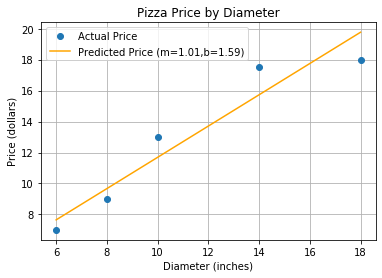

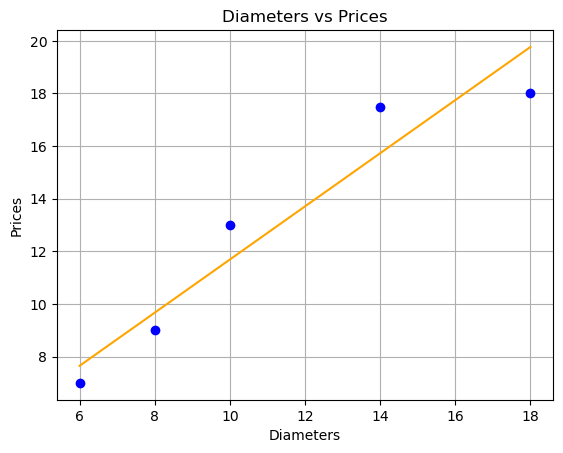

In [144]:
# ENTER YOUR CODE HERE
plt.plot(diameters, prices, "bo")
plt.title("Diameters vs Prices")
plt.xlabel("Diameters")
plt.ylabel("Prices")
plt.plot(diameters, compute_all_y(diameters, m_min, b_min), color = "orange")
plt.title("Diameters vs Prices")
plt.xlabel("Diameters")
plt.ylabel("Prices")
plt.grid();

Congratulations! You have just written your first “machine learning” algorithm! One fun thing you can do is to save the MSE at the end of each iteration and then plot the final list of MSEs (or just print them out at each iteration). You should see the error go down pretty quickly and then level off or go down very gradually. Note that the error will never go to 0 because the data isn’t perfectly linear. Nothing in the real world is!

At this point, your algorithm's ability to ‘learn’ is limited by how much you change the slope and intercept values each time through the loop. At the beginning it's good to change them by a lot but as you get closer to the best answer, it's better to tweak them by smaller and smaller amounts. Can you adjust your code above to do this? (not required)

---
## Closed Form Solution
For two dimensional data there is even a closed form solution to this problem that one could derive using a bit of calculus. We will calculate the slope and intercept using this closed form solution and compare with our previous results using the algorithm above. The closed form solution for slope and intercept are: slope = covariance / variance and intercept = avg(y) - slope * avg(x).

Fortunately, we already created functions in last week's statistics functions activity for calculating the mean and variance so we will reuse that code here. Copy and paste the code you created in the statistics functions activity for the functions `calc_sum`, `calc_mean`, `calc_square`, and `calc_variance` in the code cell below. If you didn't complete them last week, please refer back to the activity for details and create them here. Mainly we need the mean and variance calculations.

In [72]:
# ENTER YOUR CODE HERE
# slope = covariance / variance and intercept = avg(y) - slope * avg(x)
def calc_sum(numbers):
    num_sum = 0
    for num in numbers:
        num_sum += num
    #print(num_sum)
    return num_sum

def calc_mean(numbers):
    num_mean = calc_sum(numbers) / len(numbers)
    #print(num_mean)
    return num_mean

def calc_square(number):
    return number ** 2

def calc_variance(numbers):
    for num in numbers:
        var = sum(calc_square(num - calc_mean(numbers)) for num in numbers) / len(numbers)
    return var

In [74]:
# Run this cell to print the output from your functions
print('mean of x =', calc_mean(diameters))
print('variance of x =', calc_variance(diameters))

mean of x = 11.2
variance of x = 18.56


In [75]:
# Run this cell to perform a sanity check
assert round(calc_mean([6,8,10,14,18]), 1) == 11.2, 'Incorrect result'
assert round(calc_variance([6,8,10,14,18]), 2) == 18.56, 'Incorrect result'
print('Pass')

Pass


---
### Covariance
Next, we will define a function called `calc_covariance(x_list, y_actual_list)`. This function will take in a list of x values and a list of known/actual y values as parameters and return the covariance calculaton shown below. For each value in x, this function subtracts the mean of the x values from that x value, subtracts the mean of the y values from the corresponding y value, multiplies those two results together, sums these results for all of the x values, and divides by the total number of x values. You can use your `calc_mean` function in this function.

$$ covariance = \frac{1}{n} \sum_{i=1}^{n}{(x_i-x_{mean})(y_i-y_{mean})} $$

For example, say the x values were [4, 6, 8] and the corresponding list of y values were [3, 5, 7], then the covariance would be calculated as follows:

$$ x_{mean} = \frac{4+6+8}{3}=6 $$
$$ y_{mean} = \frac{3+5+7}{3}=5 $$
$$ covariance = \frac{1}{3}[(4-6)(3-5) + (6-6)(5-5) + (8-6)(7-5)] = \frac{8}{3}$$

In [138]:
# ENTER YOUR CODE HERE
def calc_covariance(x_list, y_actual_list):
    covariance = 0 # don't forget to initialize the variable first
    for x, y in zip(x_list, y_actual_list):
        covariance += (x - calc_mean(x_list))*(y - calc_mean(y_actual_list))/len(x_list)
    covariance = round(covariance, 2)
    print(covariance) # need to make sure this isn't inside of the for loop
    return covariance
    
calc_covariance([6,8,10,14,18], [7,9,13,17.5,18])

18.12


18.12

In [139]:
# Run this cell to print the output from your function
calc_covariance(diameters, prices)

18.12


18.12

In [140]:
# Run this cell to perform a sanity check
assert round(calc_covariance([6,8,10,14,18], [7,9,13,17.5,18]), 2) == 18.12, 'Incorrect result'
print('Pass')

18.12
Pass


### Compare
Finally, use your `calc_covariance`, `calc_variance`, and `calc_mean` functions to compute the closed form solution for the slope and y intercept values. Set these equal to variables named `m_closed` and `b_closed`.

$$ m_{closed} = \frac{covariance}{variance_x} $$

$$ b_{closed} = mean_y - m_{closed} \cdot mean_x $$

In [148]:
# ENTER YOUR CODE HERE
m_closed = calc_covariance(diameters, prices)/calc_variance(diameters)
b_closed = calc_mean(prices) - m_closed * calc_mean(diameters)

18.12


In [149]:
# Run this cell to print the results
print('m_closed =', m_closed, ', b_closed =', b_closed)

m_closed = 0.976293103448276 , b_closed = 1.9655172413793096


In [151]:
# Run this cell to perform a sanity check
from scipy import stats
m_closed_test, b_closed_test, _, _, _ = stats.linregress(diameters,prices)
assert round(m_closed, 2) == round(m_closed_test, 2), 'Incorrect result'
assert round(b_closed, 2) == round(b_closed_test, 2), 'Incorrect result'
print('Pass')

Pass


If all goes well, you should see that your slope and intercept values obtained from our minimize MSE function are somewhat close to the closed form solution. Don't worry if they are not as close as you were expecting. It's always possible that you found a line that might differ a bit from the optimal line.

Note: You just have to print out the values above and compare them yourself. You are not required to compare them quantitatively or write anything about it.

---
# Predicting Temps from Cricket Chirps

Now that you have the regression algorithm working on this toy data set, we will try it out on another dataset. It is said that there is a correlation between the number of times a cricket chirps and the temperature.

`
Data file: crickets_train.csv
chirps/min,temp
19.79999924,93.30000305
18.39999962,84.30000305
17.10000038,80.59999847
15.5,75.19999695
14.69999981,69.69999695
17.10000038,82
15.39999962,69.40000153
16.20000076,83.30000305
17.20000076,82.59999847
16,80.59999847
17,83.5
14.39999962,76.30000305
`

`
Data file: crickets_test.csv
chirps/min,temp
20,88.59999847
16,71.59999847
15,79.59999847
`

We will find the best slope and intercept using the `crickets_train.csv` file. Then, using the slope and intercept, we will make predictions using the number of chirps in the `crickets_test.csv` file. You can see how well you did with this data because you also have a known temperature to compare it to (temps in `crickets_test.csv`).

---
### Read Cricket Training and Testing Data
Read in the comma-separated values file called `crickets_train.csv`. Save the chirp values to a list called `chirps_train` and the temp values to a list called `temps_train`. Both lists should be floating point values and not strings. You'll have to take into account that there is a header row in the file. You are allowed to use Python's built-in string methods such as `split`.

In [38]:
# ENTER YOUR CODE HERE
with open("crickets_train.csv","r") as file:
    reader = csv.reader(file)
    header_row = next(reader)
    chirps_train, temps_train = [], []
    for row in reader:
        chirps_train.append(row[0])
        temps_train.append(row[1])
    chirps_train = [round(float(x),4) for x in chirps_train]
    temps_train = [round(float(x),4) for x in temps_train]
    print(chirps_train)
    print(temps_train)
    

[19.8, 18.4, 17.1, 15.5, 14.7, 17.1, 15.4, 16.2, 17.2, 16.0, 17.0, 14.4]
[93.3, 84.3, 80.6, 75.2, 69.7, 82.0, 69.4, 83.3, 82.6, 80.6, 83.5, 76.3]


In [39]:
# Run this cell to print the data
print(chirps_train)
print(temps_train)

[19.8, 18.4, 17.1, 15.5, 14.7, 17.1, 15.4, 16.2, 17.2, 16.0, 17.0, 14.4]
[93.3, 84.3, 80.6, 75.2, 69.7, 82.0, 69.4, 83.3, 82.6, 80.6, 83.5, 76.3]


In [40]:
# Run this cell to perform a sanity check
assert [round(x, 1) for x in chirps_train] == [19.8,18.4,17.1,15.5,14.7,17.1,15.4,16.2,17.2,16.0,17.0,14.4], 'Incorrect result'
assert [round(y, 1) for y in temps_train] == [93.3,84.3,80.6,75.2,69.7,82.0,69.4,83.3,82.6,80.6,83.5,76.3], 'Incorrect result'
print('Pass')

Pass


Read in the comma-separated values file called `crickets_test.csv`. Save the chirp values to a list called `chirps_test` and the temp values to a list called `temps_test`. Both lists should be floating point values and not strings. You'll have to take into account that there is a header row in the file. You are allowed to use Python's built-in string methods such as `split`.

In [42]:
# ENTER YOUR CODE HERE
with open("crickets_test.csv","r") as file:
    reader = csv.reader(file)
    header_row = next(file)
    chirps_test, temps_test = [], []
    for row in reader:
        chirps_test.append(row[0])
        temps_test.append(row[1])
    chirps_test = [float(x) for x in chirps_test]
    temps_test = [round(float(x), 2) for x in temps_test]
    print(chirps_test)
    print(temps_test)

[20.0, 16.0, 15.0]
[88.6, 71.6, 79.6]


In [43]:
# Run this cell to print the data
print(chirps_test)
print(temps_test)

[20.0, 16.0, 15.0]
[88.6, 71.6, 79.6]


In [44]:
# Run this cell to perform a sanity check
assert [round(x, 1) for x in chirps_test] == [20.0,16.0,15.0], 'Incorrect result'
assert [round(y, 1) for y in temps_test] == [88.6,71.6,79.6], 'Incorrect result'
print('Pass')

Pass


---
### Train Data / Make Predictions
Using your `minimize_mse` function, calculate the best slope and intercept values that minimizes the MSE. Set these slope and intercept values to variables named `m_crickets` and `b_crickets`.

In [145]:
# ENTER YOUR CODE HERE
#chirps_test = [20.0, 16.0, 15.0]
#temps_test = [88.6, 71.6, 79.6]
m_crickets, b_crickets = minimize_mse(chirps_test, temps_test, m_start, b_start, m_step, b_step, iterations)
print("m=", m_crickets, "b=", b_crickets)

m= 3.8600000000000243 b= 13.88999999999981


Now plot the training data along with the regression line showing the predicted temps using the slope and intercept from your model. Confirm that your line 'fits' the data well. The resulting plot should look similar to this:

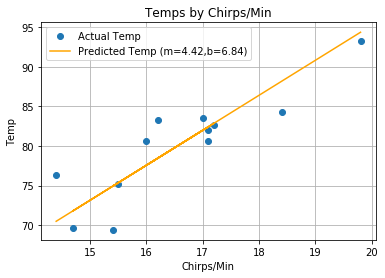

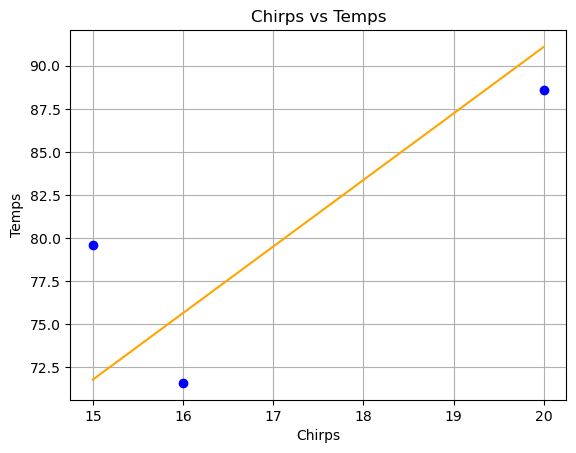

In [146]:
# ENTER YOUR CODE HERE
plt.plot(chirps_test, temps_test, "bo")
plt.title("Chirps vs Temps")
plt.xlabel("Chirps")
plt.ylabel("Temps")
plt.plot(chirps_test, compute_all_y(chirps_test, m_crickets, b_crickets), color = "orange")
plt.title("Chirps vs Temps")
plt.xlabel("Chirps")
plt.ylabel("Temps")
plt.grid();

Then, using the chirps from the test data (`chirps_test`) and your best slope (`m_crickets`) and intercept (`b_crickets`) values, calculate the predicted temp values (using the `compute_all_y`). Compare these values to the actual known temp values from the dataset (`temps_test`). If they are fairly close, then you have successfully 'trained' a model that can be used to predict the temperature from the number of times a cricket chirps per minute!

Note: You just have to print out the values below and compare them yourself. You are not required to compare them quantitatively or write anything about it.

In [147]:
# ENTER YOUR CODE HERE
predicted_temp = compute_all_y(chirps_test, m_crickets, b_crickets)
print(predicted_temp)
print(temps_test)

[91.0900000000003, 75.6500000000002, 71.79000000000018]
[88.6, 71.6, 79.6]


---
# Optional Challenge (Not graded)

In the Runestone book, there is a second part to this linear regression project called **Project 19: Better Pizza Predictions with Multiple Regression**. It uses the code we developed in this notebook as a base and extends it to multiple dimensions. Try this project out for an additional challenge. You may use the space below to develop your code for that project if desired.

In [ ]:
# ENTER YOUR CODE HERE


---
Citation: This project was adapted with modifications from Project 17: Predicting Pizza Prices - Linear Regression from the Runestone Interactive online textbook Foundation of Python Programming by Bradley Miller.